# Classifier für Wohnungsbilder - CNN with Datagen

## Build and train model

In [3]:
import sys
import os

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot

import tensorflow as tf
tf.set_random_seed(1)

import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten

from sklearn.metrics import confusion_matrix

print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

Keras 2.1.3 TF 1.1.0 Python sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [2]:
def create_datagens(img_width, img_height, batch_size, train_dir, valid_dir):

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    valid_datagen = ImageDataGenerator(
        rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)
    
    return train_generator, valid_generator

In [3]:
def define_network(img_width, img_height):
    
    model = Sequential()
    
    name = "cnn_dg_5c2d"

    # Convolutional Layers

    model.add(Convolution2D(32, kernel_size, padding='same', input_shape = (img_width, img_height, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Convolution2D(32, kernel_size, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(0.3))

    model.add(Convolution2D(64, kernel_size, padding='same', input_shape = (img_width, img_height, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Convolution2D(64, kernel_size, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Convolution2D(64, kernel_size, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(0.3))


    # Dense Layers
    
    model.add(Flatten())

    model.add(Dense(500))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Activation('relu'))

    model.add(Dense(500))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Activation('relu'))

    # Output Layer
    
    model.add(Dense(6))
    model.add(Activation("softmax"))

    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])
    
    return model, name

In [4]:
# parameters

train_dir = "data/clean/train/"
valid_dir = "data/clean/valid/"
test_dir = "data/clean/test/"

n_train = len(os.listdir(train_dir))
n_valid = len(os.listdir(valid_dir))

img_width = 75
img_height = 75
batch_size = 32
epochs = 20
kernel_size = (3,3)
pool_size = (2,2)

# preprocessing
train_generator, valid_generator = create_datagens(img_width, img_height, batch_size, train_dir, valid_dir)

# network layout
model, name = define_network(img_width, img_height)

model.summary()

Found 1465 images belonging to 6 classes.
Found 264 images belonging to 6 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 32)        0         
___________________________________________________________

In [5]:
# setup tensorboard
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/' + name + '/', 
        write_graph=True,
        histogram_freq=0)

# save model
savedir = "checkpoints/" + name + "/"
os.makedirs(savedir, exist_ok = True)       
checkpointer = keras.callbacks.ModelCheckpoint( 
        filepath =  savedir + "weights_epoch_{epoch:03d}_val_loss_{val_loss:.2f}",
        verbose = 1, 
        save_best_only = False,
        period = 10)

In [6]:
history = model.fit_generator(
    generator=train_generator,
    epochs=epochs,
    verbose = 1,
    validation_data=valid_generator,
    callbacks=[tensorboard,checkpointer])

Epoch 1/20
46/46 [==============================] - 69s 2s/step - loss: 1.2007 - acc: 0.5707 - val_loss: 1.3074 - val_acc: 0.7008
Epoch 2/20
46/46 [==============================] - 66s 1s/step - loss: 0.8979 - acc: 0.6901 - val_loss: 0.9350 - val_acc: 0.6894
Epoch 3/20
46/46 [==============================] - 64s 1s/step - loss: 0.7940 - acc: 0.7142 - val_loss: 2.0211 - val_acc: 0.6098
Epoch 4/20
46/46 [==============================] - 66s 1s/step - loss: 0.7365 - acc: 0.7398 - val_loss: 1.5783 - val_acc: 0.5985
Epoch 5/20
46/46 [==============================] - 66s 1s/step - loss: 0.6913 - acc: 0.7713 - val_loss: 1.0091 - val_acc: 0.7159
Epoch 6/20
46/46 [==============================] - 65s 1s/step - loss: 0.6393 - acc: 0.7855 - val_loss: 1.0783 - val_acc: 0.6667
Epoch 7/20
46/46 [==============================] - 64s 1s/step - loss: 0.5811 - acc: 0.8049 - val_loss: 1.0047 - val_acc: 0.7424
Epoch 8/20
46/46 [==============================] - 65s 1s/step - loss: 0.5465 - acc: 0.81

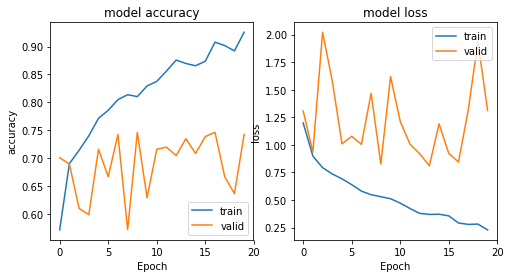

In [7]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="lower right")

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")

plt.show()

In [8]:
# start a new anaconda prompt (qtconsole) and type the command
# !tensorboard --logdir=05_Projektarbeit/tensorboard/cnn_dg_5c2d/
# open a browser at http://localhost:6006

## Prediction on Testset

In [8]:
from keras.models import load_model
model = load_model("checkpoints/cnn_dg_5c2d/weights_epoch_020_val_loss_1.31")

In [9]:
img_width = 75
img_height = 75

In [10]:
test_files_aussenansicht = os.listdir("data/clean/Test/Aussenansicht")
test_files_bad = os.listdir("data/clean/Test/Bad")
#test_files_bad = test_files_bad[0:2]
#test_files_bad
test_files_divers = os.listdir("data/clean/Test/Divers")
test_files_grundriss = os.listdir("data/clean/Test/Grundriss")
test_files_innenansicht = os.listdir("data/clean/Test/Innenansicht")
test_files_kueche = os.listdir("data/clean/Test/Küche")

In [11]:
# no of test images
np.sum([73, 44, 21, 16, 83, 34])

271

In [12]:
X_test = []

for i in test_files_aussenansicht:
    img = image.load_img("data/clean/Test/Aussenansicht/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    X_test.append(img)

for i in test_files_bad:
    img = image.load_img("data/clean/Test/Bad/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    X_test.append(img)

for i in test_files_divers:
    img = image.load_img("data/clean/Test/Divers/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    X_test.append(img)
    
for i in test_files_grundriss:
    img = image.load_img("data/clean/Test/Grundriss/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    X_test.append(img)
    
for i in test_files_innenansicht:
    img = image.load_img("data/clean/Test/Innenansicht/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    X_test.append(img)
    
for i in test_files_kueche:
    img = image.load_img("data/clean/Test/Küche/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    X_test.append(img)

X_test = np.asarray(X_test)
X_test.shape
#X_test[1]

(271, 75, 75, 3)

In [13]:
Y_test = []

for i in test_files_aussenansicht:
    Y_test.append(0)
    
for i in test_files_bad:
    Y_test.append(1)

for i in test_files_divers:
    Y_test.append(2)

for i in test_files_grundriss:
    Y_test.append(3)

for i in test_files_innenansicht:
    Y_test.append(4)

for i in test_files_kueche:
    Y_test.append(5)

Y_test = np.asarray(Y_test)
print(Y_test.shape)
Y_test[:]

(271,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [14]:
preds_test = model.predict(X_test)
preds_test[0:5]

array([[  9.68356192e-01,   1.54099337e-11,   4.31485532e-05,
          2.51340765e-07,   3.16003747e-02,   5.11632348e-10],
       [  9.99948978e-01,   1.52093393e-09,   4.30463697e-05,
          8.03451167e-06,   6.34462660e-09,   6.06116448e-14],
       [  9.99757230e-01,   1.10076087e-12,   9.56767394e-07,
          3.84741394e-09,   2.41788191e-04,   6.58387858e-11],
       [  6.46881878e-01,   3.07246978e-07,   4.57610749e-03,
          4.20766264e-05,   3.48499149e-01,   4.31753278e-07],
       [  1.11681242e-02,   4.67139482e-03,   1.89351067e-02,
          5.88482835e-05,   9.64290738e-01,   8.75822268e-04]], dtype=float32)

In [15]:
np.argmax(preds_test,axis=1)[0:5]

array([0, 0, 0, 0, 4])

In [16]:
Y_test[0:5]

array([0, 0, 0, 0, 0])

In [17]:
Y_test[:] == np.argmax(preds_test,axis=1)

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [18]:
print(confusion_matrix(Y_test[:],np.argmax(preds_test,axis=1)))
print("Acc = " ,np.sum(Y_test[:]==np.argmax(preds_test,axis=1))/len(preds_test))

[[64  0  4  0  4  1]
 [ 2 27  2  0 12  1]
 [13  1  2  2  3  0]
 [ 1  0  0 15  0  0]
 [ 5  1  3  0 73  1]
 [ 3  2  1  0 20  8]]
Acc =  0.69741697417


In [19]:
sorted(os.listdir("data/clean/test"))
# no of test images
# [73, 44, 21, 16, 83, 34]

['.DS_Store',
 'Aussenansicht',
 'Bad',
 'Divers',
 'Grundriss',
 'Innenansicht',
 'Küche']

## Visualize right/wrong

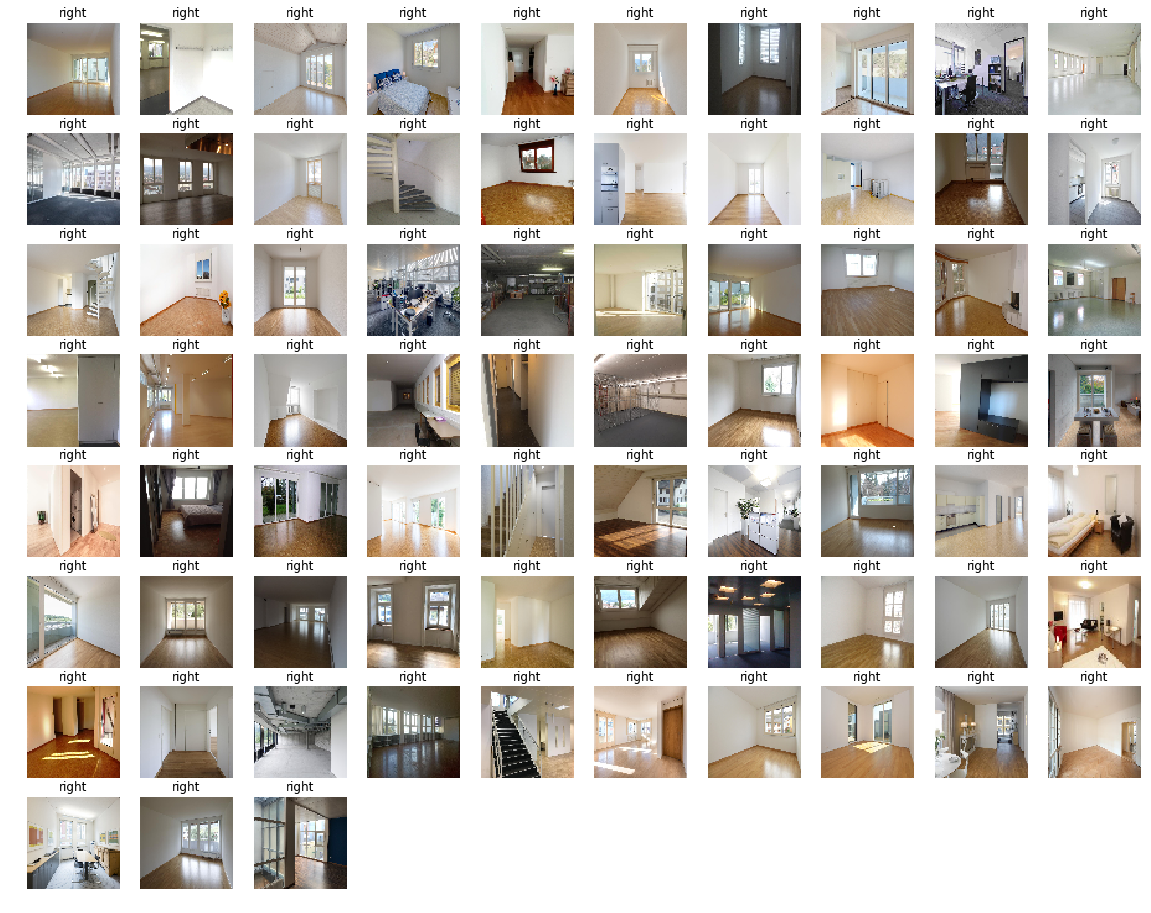

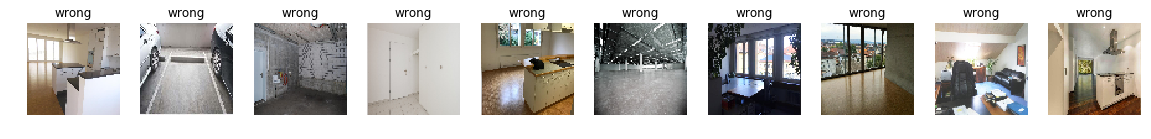

In [24]:
pred = np.argmax(preds_test,axis=1)

#Klasse = 0 # Aussenansicht
#Klasse = 1 # Bad
#Klasse = 2 # Divers
#Klasse = 3 # Grundriss
Klasse = 4 # Innenansicht
#Klasse = 5 # Küche

right = np.where(Y_test[:]==Klasse)[0][np.where(np.in1d(np.where(Y_test[:]==Klasse),np.where(pred[:]==Klasse)))]
wrong = np.where(Y_test[:]==Klasse)[0][(np.in1d(np.where(Y_test[:]==Klasse),np.where(pred[:]==Klasse)))==False]

plt.figure(figsize=(20,20))

for i in range(0,len(right)):
    plt.subplot(10,10,(i+1))
    plt.imshow(np.asarray(X_test[right[i]]))
    plt.axis('off')
    plt.title('right')
    
plt.figure(figsize=(20,20))

for i in range(0,len(wrong)):
    plt.subplot(10,10,(i+1))
    plt.imshow(np.asarray(X_test[wrong[i]]))
    plt.axis('off')
    plt.title('wrong')